Modify the scratch code of K-means clustering in our lecture:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

Mini-Batch will rarely converge, thus it is important to add a max_iteration or some tolerance.  Last, theoretically speaking, Mini-Batch will never perform better in terms of accuracy when compare to K-means, but it is very close to optimal but will almost always beat K-means in terms of time given large dataset and a modest tolerance parameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import random

In [2]:
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

In [3]:
class kmeans:
    def __init__(self, k=4, method='batch', max_iters=100, show_plot=True, batch_size=100):
        self.k = k
        self.method = method
        self.max_iters = max_iters
        self.show_plot = show_plot
        self.batch_size = batch_size

    def fit(self, X):
        m, n = X.shape

        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:self.k]
        centers = X[i]

        iteration = 0
        used_idx = np.zeros(m-self.batch_size)
        while True:
            if self.method == 'mini-batch':
                idx = random.randint(0, m-self.batch_size-1)
                while used_idx[idx] == 1:
                    idx = random.randint(0, m-1)
                used_idx[idx] = 1
                _X = X[idx: idx+self.batch_size]
                if sum(used_idx) == m:
                    used_idx = np.zeros(m-self.batch_size)
            else:
                _X = X

            labels = pairwise_distances_argmin(_X, centers)

            new_centers = np.zeros((self.k, n))
            for i in range(self.k):
                new_centers[i, :] = _X[labels == i].mean(axis=0)

            if (iteration % 5 == 0) and self.show_plot:
                pred = pairwise_distances_argmin(X, new_centers)
                plt.figure(figsize=(5, 2))
                plt.title(f"Iteration: {iteration}")
                plt.scatter(X[:, 0], X[:, 1], c=pred)
                plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

            if self.method == 'mini-batch' and iteration == self.max_iters:
                break
            if np.allclose(centers, new_centers):
                break
            else:
                centers = new_centers
                iteration+=1
        self.centers = centers
        labels = self.predict(X)
        variances = [sum(np.var(X[labels == i],axis=0)) for i in range(self.k)]
        
        print(f"Done in {iteration} iterations")
        
        return centers, variances

    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)
    

Done in 14 iterations
total variance: 2.683375541430692
predicted: [3 3 3 ... 3 1 0]


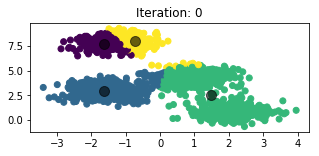

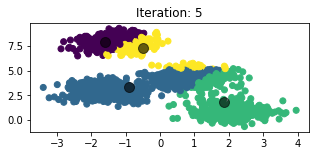

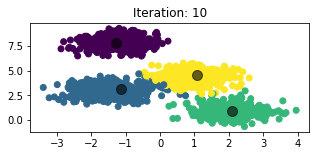

In [4]:
model = kmeans(k=4, method='batch', show_plot=True)
centers, variance = model.fit(X)
predicted = model.predict(X)
print("total variance:", sum(variance))
print("predicted:", predicted)

Done in 30 iterations
total variance: 4.171178114115245
predicted: [1 1 1 ... 1 1 3]


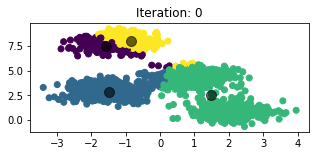

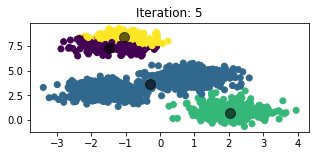

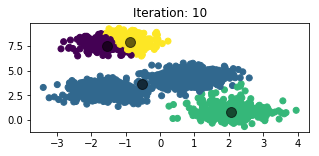

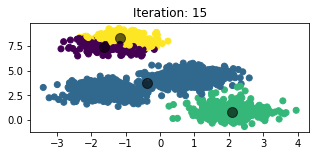

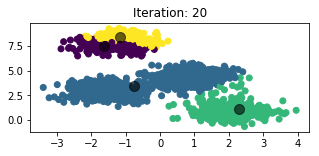

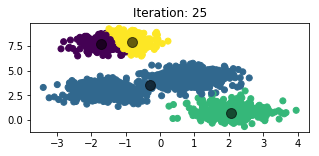

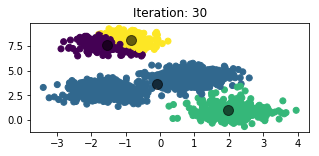

In [5]:
model = kmeans(k=4, method='mini-batch', show_plot=True, max_iters=30, batch_size=100)
centers, variance = model.fit(X)
predicted = model.predict(X)
print("total variance:", sum(variance))
print("predicted:", predicted)

Try multiple k

In [6]:
k_range = range(2, 10)
for k in k_range:
    model = kmeans(k=k, method='batch', show_plot=False)
    centers, variance = model.fit(X)
    predicted = model.predict(X)
    print(f"total variance for k = {k}: {sum(variance)}")
    print("predicted:", predicted)

Done in 4 iterations
total variance for k = 2: 5.659081635394873
predicted: [1 1 1 ... 1 1 0]
Done in 10 iterations
total variance for k = 3: 4.016515579051976
predicted: [1 1 1 ... 1 1 0]
Done in 14 iterations
total variance for k = 4: 2.683375541430692
predicted: [3 3 3 ... 3 1 0]
Done in 7 iterations
total variance for k = 5: 2.8762054271725357
predicted: [2 2 2 ... 2 1 3]
Done in 15 iterations
total variance for k = 6: 3.140043590241985
predicted: [2 2 2 ... 2 1 3]
Done in 16 iterations
total variance for k = 7: 3.1273653441183513
predicted: [2 2 2 ... 2 1 3]
Done in 16 iterations
total variance for k = 8: 3.1564389098620698
predicted: [2 2 2 ... 2 7 3]
Done in 17 iterations
total variance for k = 9: 3.3357585741662605
predicted: [8 8 8 ... 2 7 3]
